In [1477]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Задание 1

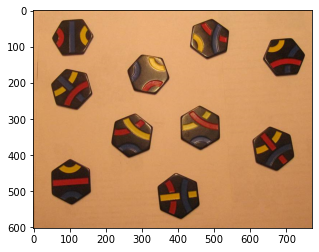

In [1478]:
image = cv.imread('Group_5.bmp')[:, :, ::-1]
plt.imshow(image)

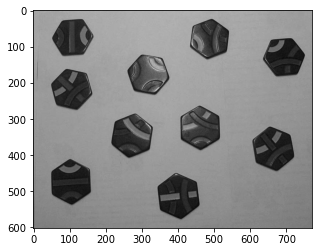

In [1479]:
imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(imgray, cmap='gray')

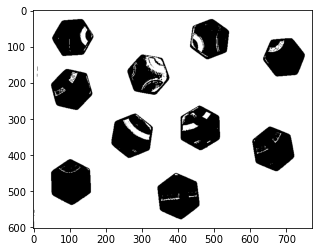

In [1480]:
ret, thresh = cv.threshold(imgray, 100, 255, 0)
plt.imshow(thresh, cmap='gray')

Фишек на картинке:  10


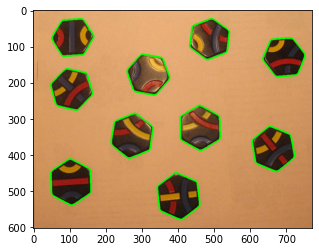

In [1481]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
area_image = image.shape[0] * image.shape[1]
for contour in contours:
    if cv.contourArea(contour) > area_image * 0.01 and cv.contourArea(contour) < area_image * 0.9:
        new_contours.append(contour)
        
shape = image.copy()
cv.drawContours(shape, new_contours, -1, (0, 255, 0), 3)
plt.imshow(shape)
print('Фишек на картинке: ', len(new_contours))

## Задание 2

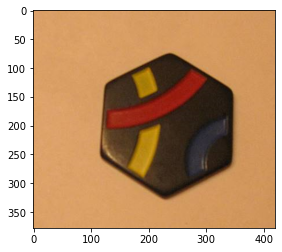

In [1482]:
image = cv.imread('Single_2.bmp')[:, :, ::-1]
plt.imshow(image)

In [1483]:
imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 80, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
area_image = image.shape[0] * image.shape[1]
for contour in contours:
    if cv.contourArea(contour) > area_image * 0.02 and cv.contourArea(contour) < area_image * 0.9:
        new_contours.append(contour)
area_figure = cv.contourArea(new_contours[0])
per_figure = cv.arcLength(new_contours[0], True) 

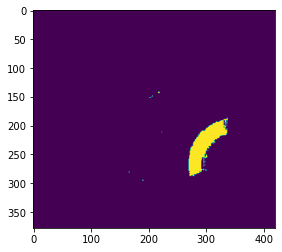

In [1484]:
lower_blue = np.array([0,0,42])
upper_blue = np.array([70,70,255])
mask = cv.inRange(image, lower_blue, upper_blue)

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
for contour in contours:
    if cv.contourArea(contour) > area_figure * 0.02 and cv.contourArea(contour) < area_figure * 0.9:
        new_contours.append(contour)
area_blue = 0
per_blue = 0
comp_blue = len(new_contours)
for c in new_contours:
    area_blue += cv.contourArea(c)
    per_blue += cv.arcLength(c, True) 

plt.imshow(mask)

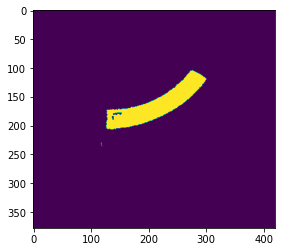

In [1485]:
lower_red = np.array([100,0,0])
upper_red = np.array([255,50,50])
mask = cv.inRange(image, lower_red, upper_red)

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
for contour in contours:
    if cv.contourArea(contour) > area_figure * 0.02 and cv.contourArea(contour) < area_figure * 0.9:
        new_contours.append(contour)
area_red = 0
per_red = 0
comp_red = len(new_contours)
for c in new_contours:
    area_red += cv.contourArea(c)
    per_red += cv.arcLength(c, True) 

plt.imshow(mask)

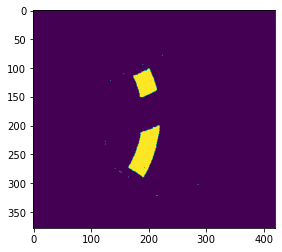

In [1486]:
lower_yellow = np.array([100,100,0])
upper_yellow = np.array([255,255,50])
mask = cv.inRange(image, lower_yellow, upper_yellow)

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
for contour in contours:
    if cv.contourArea(contour) > area_figure * 0.02 and cv.contourArea(contour) < area_figure * 0.9:
        new_contours.append(contour)
area_yellow = 0
per_yellow = 0
comp_yellow = len(new_contours)
for c in new_contours:
    area_yellow += cv.contourArea(c)
    per_yellow += cv.arcLength(c, True) 

plt.imshow(mask)

In [1487]:
coef_blue = per_blue / per_figure * 100 - 48
coef_red = per_red / per_figure * 100 - 48
coef_yellow = per_yellow / per_figure * 100 - 48
    
ind_blue = (coef_blue >= 0 or (comp_blue > 1 and coef_blue > -5)) and comp_blue > 0
ind_red = (coef_red >= 0 or (comp_red > 1 and coef_red > -5)) and comp_red > 0
ind_yellow = (coef_yellow >= 0 or (comp_yellow > 1 and coef_yellow > -5)) and comp_yellow > 0

if (comp_blue > 1 or coef_blue >= 0) and comp_blue > 0:
    print('Длинная синяя')
else:
    print('Короткая синяя')

if (comp_red > 1 or coef_red >= 0) and comp_blue > 0:
    print('Длинная красная')
else:
    print('Короткая красная')

if (comp_yellow > 1 or coef_yellow >= 0) and comp_yellow > 0:
    print('Длинная желтая')
else:
    print('Короткая желтая')

Короткая синяя
Длинная красная
Длинная желтая


## Задание 3

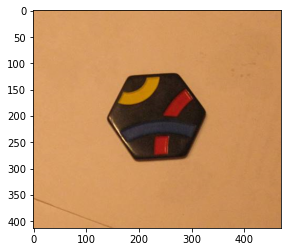

In [1498]:
image = cv.imread('Single_1.bmp')[:, :, ::-1]
plt.imshow(image)

In [1499]:
imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 80, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
area_image = image.shape[0] * image.shape[1]
for contour in contours:
    if cv.contourArea(contour) > area_image * 0.02 and cv.contourArea(contour) < area_image * 0.9:
        new_contours.append(contour)
area_figure = cv.contourArea(new_contours[0])
per_figure = cv.arcLength(new_contours[0], True) 

lower_blue = np.array([0,0,45])
upper_blue = np.array([80,80,255])
mask = cv.inRange(image, lower_blue, upper_blue)

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
for contour in contours:
    if cv.contourArea(contour) > area_figure * 0.02 and cv.contourArea(contour) < area_figure * 0.9:
        new_contours.append(contour)
area_blue = 0
per_blue = 0
comp_blue = len(new_contours)
for c in new_contours:
    area_blue += cv.contourArea(c)
    per_blue += cv.arcLength(c, True) 
    
lower_red = np.array([100,0,0])
upper_red = np.array([255,50,50])
mask = cv.inRange(image, lower_red, upper_red)

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
for contour in contours:
    if cv.contourArea(contour) > area_figure * 0.02 and cv.contourArea(contour) < area_figure * 0.9:
        new_contours.append(contour)
area_red = 0
per_red = 0
comp_red = len(new_contours)
moment_red = []
for c in new_contours:
    area_red += cv.contourArea(c)
    per_red += cv.arcLength(c, True) 
    M = cv.moments(c)
    moment_red.append(int(M['m10']/M['m00']))

lower_yellow = np.array([100,100,0])
upper_yellow = np.array([255,255,50])
mask = cv.inRange(image, lower_yellow, upper_yellow)

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
for contour in contours:
    if cv.contourArea(contour) > area_figure * 0.02 and cv.contourArea(contour) < area_figure * 0.9:
        new_contours.append(contour)
area_yellow = 0
per_yellow = 0
comp_yellow = len(new_contours)
moment_yellow = []
for c in new_contours:
    area_yellow += cv.contourArea(c)
    per_yellow += cv.arcLength(c, True)
    M = cv.moments(c)
    moment_yellow.append(int(M['m10']/M['m00']))
    
coef_blue = per_blue / per_figure * 100 - 48 + area_blue / area_figure * 100 - 8.5
coef_red = per_red / per_figure * 100 - 48 + area_red / area_figure * 100 - 8.5
coef_yellow = per_yellow / per_figure * 100 - 48 + area_yellow / area_figure * 100 - 8.5
ind_blue = (coef_blue >= 0 or (comp_blue > 1 and coef_blue > -5)) and comp_blue > 0
ind_red = (coef_red >= 0 or (comp_red > 1 and coef_red > -5)) and comp_red > 0
ind_yellow = (coef_yellow >= 0 or (comp_yellow > 1 and coef_yellow > -5)) and comp_yellow > 0

if ind_blue and ind_red and not ind_yellow:
    if comp_blue == 2 or (comp_red == 1 and area_blue < area_red):
        print('Фишка номер 1')
    else:
        print('Фишка номер 10')
elif ind_blue and not ind_red and not ind_yellow:
    print('Фишка номер 2')
elif not ind_blue and not ind_red:
    print('Фишка номер 3')
elif ind_blue and ind_red and ind_yellow and comp_blue == 2 and comp_yellow == 2:
    print('Фишка номер 4')
elif not ind_blue and ind_red and not ind_yellow:
    print('Фишка номер 5')
elif ind_blue and ind_red and ind_yellow and comp_red == 2 and comp_yellow == 2:
    if area_yellow > area_red:
        print('Фишка номер 6')
    else:
        print('Фишка номер 9')
elif not ind_blue and ind_red and ind_yellow and comp_yellow == 2:
    print('Фишка номер 7')
elif not ind_blue and ind_red and ind_yellow and comp_red == 2:
    print('Фишка номер 8')
else:
    print('NaN')

Фишка номер 10


## Задание 4

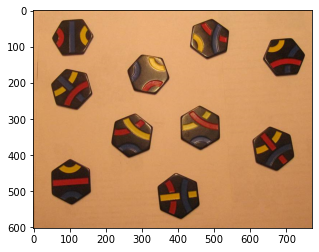

In [1501]:
image = cv.imread('Group_5.bmp')[:, :, ::-1]
plt.imshow(image)

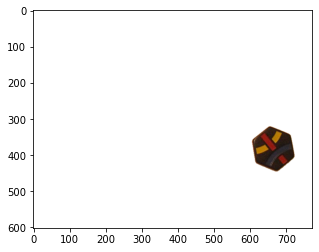

In [1502]:
imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 100, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
new_contours = []
area_image = image.shape[0] * image.shape[1]
for contour in contours:
    if cv.contourArea(contour) > area_image * 0.01 and cv.contourArea(contour) < area_image * 0.9:
        new_contours.append(contour)

ans = image.copy()
shape = image.copy()
shape = cv.cvtColor(shape, cv.COLOR_BGR2GRAY)
cv.fillPoly(shape, pts=[new_contours[2]], color=(0, 0, 0))
_, binary = cv.threshold(shape, 0, 255, cv.THRESH_BINARY)
figure = image | np.concatenate((binary[:, :, np.newaxis], binary[:, :, np.newaxis], binary[:, :, np.newaxis]), axis=2)
plt.imshow(figure)

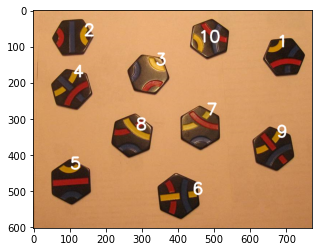

In [1503]:
for c in new_contours:
    shape = image.copy()
    shape = cv.cvtColor(shape, cv.COLOR_BGR2GRAY)
    cv.fillPoly(shape, pts=[c], color=(0, 0, 0))
    _, binary = cv.threshold(shape, 0, 255, cv.THRESH_BINARY)
    figure = image | np.concatenate((binary[:, :, np.newaxis], binary[:, :, np.newaxis], binary[:, :, np.newaxis]), axis=2)
    
    area_figure = cv.contourArea(c)
    per_figure = cv.arcLength(c, True) 

    lower_blue = np.array([0,0,42])
    upper_blue = np.array([70,70,255])
    mask = cv.inRange(figure, lower_blue, upper_blue)

    contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    blue_contours = []
    for contour in contours:
        if cv.contourArea(contour) > area_figure * 0.01 and cv.contourArea(contour) < area_figure * 0.9:
            blue_contours.append(contour)
    area_blue = 0
    per_blue = 0
    comp_blue = len(blue_contours)
    for c in blue_contours:
        area_blue += cv.contourArea(c)
        per_blue += cv.arcLength(c, True) 
    
    lower_red = np.array([100,0,0])
    upper_red = np.array([255,50,50])
    mask = cv.inRange(figure, lower_red, upper_red)

    contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    red_contours = []
    for contour in contours:
        if cv.contourArea(contour) > area_figure * 0.01 and cv.contourArea(contour) < area_figure * 0.9:
            red_contours.append(contour)
    area_red = 0
    per_red = 0
    comp_red = len(red_contours)
    for c in red_contours:
        area_red += cv.contourArea(c)
        per_red += cv.arcLength(c, True) 

    lower_yellow = np.array([100,100,0])
    upper_yellow = np.array([255,255,50])
    mask = cv.inRange(figure, lower_yellow, upper_yellow)

    contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    yellow_contours = []
    for contour in contours:
        if cv.contourArea(contour) > area_figure * 0.01 and cv.contourArea(contour) < area_figure * 0.9:
            yellow_contours.append(contour)
    area_yellow = 0
    per_yellow = 0
    comp_yellow = len(yellow_contours)
    for c in yellow_contours:
        area_yellow += cv.contourArea(c)
        per_yellow += cv.arcLength(c, True)
    
    coef_blue = per_blue / per_figure * 100 - 48
    coef_red = per_red / per_figure * 100 - 48
    coef_yellow = per_yellow / per_figure * 100 - 48
    
    ind_blue = (coef_blue >= 0 or (comp_blue > 1 and coef_blue > -5)) and comp_blue > 0
    ind_red = (coef_red >= 0 or (comp_red > 1 and coef_red > -5)) and comp_red > 0
    ind_yellow = (coef_yellow >= 0 or (comp_yellow > 1 and coef_yellow > -5)) and comp_yellow > 0
    
    font = cv.FONT_HERSHEY_SIMPLEX
    M = cv.moments(c)
    org = (int(M['m10']/M['m00']), int(M['m01']/M['m00']))
    fontScale = 1.5
    color = (255, 255, 255)
    thickness = 3
    
    if ind_blue and ind_red and not ind_yellow:
        if comp_blue == 2 or (comp_red == 1 and area_blue < area_red):
            ans = cv.putText(ans, '1', org, font, fontScale, color, thickness, cv.LINE_AA)
        else:
            ans = cv.putText(ans, '10', org, font, fontScale, color, thickness, cv.LINE_AA)
    elif ind_blue and not ind_red and not ind_yellow:
        ans = cv.putText(ans, '2', org, font, fontScale, color, thickness, cv.LINE_AA)
    elif not ind_blue and not ind_red:
        ans = cv.putText(ans, '3', org, font, fontScale, color, thickness, cv.LINE_AA)
    elif ind_blue and ind_red and ind_yellow and comp_blue == 2 and comp_yellow == 2:
        ans = cv.putText(ans, '4', org, font, fontScale, color, thickness, cv.LINE_AA)
    elif not ind_blue and ind_red and not ind_yellow:
        ans = cv.putText(ans, '5', org, font, fontScale, color, thickness, cv.LINE_AA)
    elif ind_blue and ind_red and ind_yellow and comp_red == 2 and comp_yellow == 2:
        if area_yellow > area_red:
            ans = cv.putText(ans, '6', org, font, fontScale, color, thickness, cv.LINE_AA)
        else:
            ans = cv.putText(ans, '9', org, font, fontScale, color, thickness, cv.LINE_AA)
    elif not ind_blue and ind_red and ind_yellow and comp_yellow == 2:
        ans = cv.putText(ans, '7', org, font, fontScale, color, thickness, cv.LINE_AA)
    elif not ind_blue and ind_red and ind_yellow and comp_red == 2:
        ans = cv.putText(ans, '8', org, font, fontScale, color, thickness, cv.LINE_AA)
    else:
        ans = cv.putText(ans, 'Nan', org, font, fontScale, color, thickness, cv.LINE_AA)
        
plt.imshow(ans)